In [2]:
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
import pandas as pd

In [5]:
#load tables
table_t2d = pd.read_table('../table/QinT2D_deseq2_all.txt')
table_cd = pd.read_table('../table/Franzosa_CD_deseq2_all.txt')
table_asd = pd.read_table('../table/Dan_n_Wang_ASD_deseq2_all.txt')

#load shap value 
table_t2d_shap = pd.read_table('../table/QinT2D_shapely_new.txt')

In [4]:
#negative: more abundant in cases
table_t2d_negative = table_t2d.sort_values(by=['CI_95'],ascending=True).head(100)
table_cd_negative = table_cd.sort_values(by=['CI_95'],ascending=True).head(100)
table_asd_negative = table_asd.sort_values(by=['CI_95'],ascending=True).head(100)

#positive: more abundant in controls
table_t2d_positive = table_t2d.sort_values(by=['CI_5'],ascending=False).head(100)
table_cd_positive = table_cd.sort_values(by=['CI_5'],ascending=False).head(100)
table_asd_positive = table_asd.sort_values(by=['CI_5'],ascending=False).head(100)


In [32]:
#T2D shap and DESeq2 overlap
#T2D shap species
set_t2d_shap = set(table_t2d_shap.columns[2:-2])
#T2D deseq2 species
set_t2d_deseq2 = set_t2d_positive.union(set_t2d_negative)

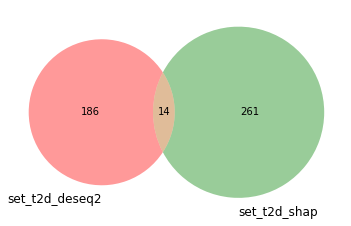

{'Acidaminococcus fermentans_A',
 'Acidaminococcus intestini',
 'Akkermansia muciniphila',
 'Anaerotruncus massiliensis',
 'Bifidobacterium adolescentis',
 'Bifidobacterium breve',
 'Bifidobacterium scardovii',
 'CAG-127 sp900539705',
 'CAG-127 sp900767585',
 'CAG-269 sp001916065',
 'CAG-485 sp900321585',
 'CAG-492 sp000434335',
 'CAG-81 sp900066055',
 'Prevotellamassilia sp900541575'}

In [35]:
venn2([set_t2d_deseq2, set_t2d_shap], ('set_t2d_deseq2','set_t2d_shap'))
plt.show()
set_t2d_deseq2.intersection(set_t2d_shap)

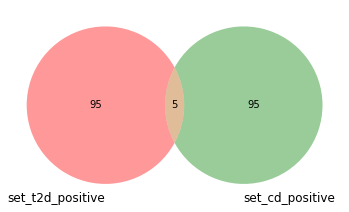

{'CAG-127 sp900319515',
 'CAG-417 sp000432835',
 'Eubacterium_R sp000434995',
 'Prevotella sp900551985',
 'Prevotella sp900556795'}

In [31]:
# T2D and CD
set_t2d_positive = set(table_t2d_positive['Unnamed: 0'])
set_cd_positive = set(table_cd_positive['Unnamed: 0'])
set_t2d_negative = set(table_t2d_negative['Unnamed: 0'])
set_cd_negative = set(table_cd_negative['Unnamed: 0'])
venn2([set_t2d_positive, set_cd_positive], ('set_t2d_positive','set_cd_positive'))
plt.show()
set_t2d_positive.intersection(set_cd_positive)

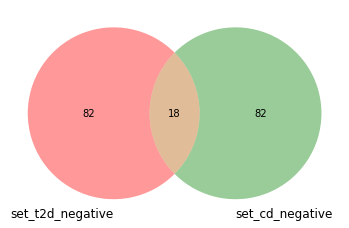

{'Acidaminococcus intestini',
 'Enterocloster sp005845215',
 'Enterococcus_A avium',
 'Enterococcus_B faecium',
 'Enterococcus_D gallinarum',
 'Erysipelatoclostridium ramosum',
 'Lactobacillus amylovorus',
 'Lactobacillus delbrueckii',
 'Lactobacillus gallinarum',
 'Lactobacillus gasseri',
 'Lactobacillus johnsonii',
 'Lactobacillus ultunensis',
 'Levilactobacillus brevis',
 'Limosilactobacillus mucosae',
 'Limosilactobacillus reuteri_E',
 'Limosilactobacillus sp012843675',
 'Limosilactobacillus timonensis',
 'Megasphaera massiliensis'}

In [55]:
venn2([set_t2d_negative, set_cd_negative], ('set_t2d_negative','set_cd_negative'))
plt.show()
set_t2d_negative.intersection(set_cd_negative)

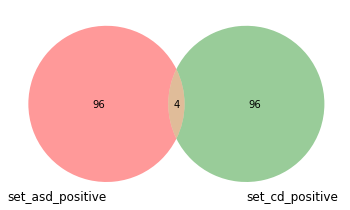

{'CAG-170 sp002404795',
 'CAG-83 sp003487665',
 'UBA11452 sp003526375',
 'Victivallis vadensis'}

In [46]:
# ASD and CD
set_asd_positive = set(table_asd_positive['Unnamed: 0'])
set_cd_positive = set(table_cd_positive['Unnamed: 0'])
set_asd_negative = set(table_asd_negative['Unnamed: 0'])
set_cd_negative = set(table_cd_negative['Unnamed: 0'])
venn2([set_asd_positive, set_cd_positive], ('set_asd_positive','set_cd_positive'))
plt.show()
set_asd_positive.intersection(set_cd_positive)

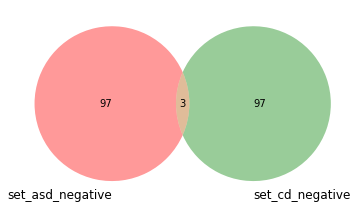

{'Lactobacillus paragasseri',
 'Limosilactobacillus mucosae',
 'Veillonella_A seminalis'}

In [47]:
venn2([set_asd_negative, set_cd_negative], ('set_asd_negative','set_cd_negative'))
plt.show()
set_asd_negative.intersection(set_cd_negative)

In [49]:
table_asd_negative

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,CI_5,CI_95
1337,Dialister hominis,6187.511409,-4.181113,0.576714,-7.249886,4.171217e-13,1.610090e-10,-5.311452,-3.050774
3381,Veillonella_A seminalis,119.664533,-4.358195,0.739896,-5.890277,3.855483e-09,4.343066e-07,-5.808365,-2.908024
1665,Fusobacterium_A ulcerans,701.705065,-3.889730,0.517602,-7.514912,5.694920e-14,2.564612e-11,-4.904211,-2.875250
30,Acidaminococcus provencensis,162.655214,-3.364577,0.539050,-6.241678,4.329009e-10,6.156307e-08,-4.421095,-2.308058
2672,Ruminococcus_E sp900314705,1200.750099,-3.026203,0.378736,-7.990281,1.346315e-15,1.818871e-12,-3.768511,-2.283895
...,...,...,...,...,...,...,...,...,...
2850,Terrisporobacter sp900557165,590.648307,-1.317862,0.341659,-3.857248,1.146708e-04,2.439690e-03,-1.987500,-0.648223
1354,Dorea formicigenerans,21542.663812,-1.311962,0.340555,-3.852421,1.169558e-04,2.468864e-03,-1.979439,-0.644486
1816,Holdemania massiliensis,6972.017306,-1.452804,0.412952,-3.518095,4.346572e-04,6.749676e-03,-2.262174,-0.643433
856,CAG-964 sp000435335,600.256250,-1.273616,0.321620,-3.960008,7.494720e-05,1.730832e-03,-1.903979,-0.643253


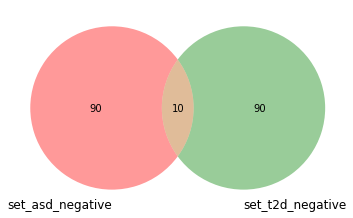

{'Acidaminococcus massiliensis',
 'Acidaminococcus provencensis',
 'Akkermansia muciniphila',
 'Bifidobacterium dentium',
 'CAG-433 sp000433675',
 'Collinsella tanakaei',
 'Eggerthella sinensis',
 'Limosilactobacillus mucosae',
 'UMGS75 sp900538885',
 'Veillonella_A sp900765165'}

In [52]:
# T2D and ASD
venn2([set_asd_negative, set_t2d_negative], ('set_asd_negative','set_t2d_negative'))
plt.show()
set_asd_negative.intersection(set_t2d_negative)

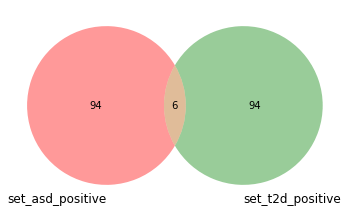

{'Phascolarctobacterium_A succinatutens',
 'Prevotellamassilia sp900541575',
 'Prevotellamassilia sp900542795',
 'Prevotellamassilia sp900546605',
 'TF01-11 sp003529475',
 'UBA9502 sp900555625'}

In [54]:
venn2([set_asd_positive, set_t2d_positive], ('set_asd_positive','set_t2d_positive'))
plt.show()
set_asd_positive.intersection(set_t2d_positive)